In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Load and preprocess the Data

In [26]:
# Define paths
train_dir = 'dataset/dataset/train'  # specify your actual training directory
val_dir = 'dataset/dataset/validation' 
from PIL import Image
import os

def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()  # Check for image validity
            except (IOError, SyntaxError):
                print(f"Corrupted image found: {img_path}")
                os.remove(img_path)  # Optional: Remove corrupted image

# Run this for both training and validation directories
verify_images(train_dir)
verify_images(val_dir)


Corrupted image found: dataset/dataset/train\are you free today\00001.jpg
Corrupted image found: dataset/dataset/train\are you free today\00080.jpg
Corrupted image found: dataset/dataset/train\are you free today\00189.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00001.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00024.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00047.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00082.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00119.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00162.jpg
Corrupted image found: dataset/dataset/train\are you hiding something\00222.jpg
Corrupted image found: dataset/dataset/train\can i help you\00001.jpg
Corrupted image found: dataset/dataset/train\can i help you\00024.jpg
Corrupted image found: dataset/dataset/train\can i help you\00072.jpg
Corrupte

Corrupted image found: dataset/dataset/train\i am afraid of that\00047.jpg
Corrupted image found: dataset/dataset/train\i am afraid of that\00103.jpg
Corrupted image found: dataset/dataset/train\i am afraid of that\00146.jpg
Corrupted image found: dataset/dataset/train\i am afraid of that\00178.jpg
Corrupted image found: dataset/dataset/train\i am crying\00001.jpg
Corrupted image found: dataset/dataset/train\i am crying\00044.jpg
Corrupted image found: dataset/dataset/train\i am crying\00068.jpg
Corrupted image found: dataset/dataset/train\i am crying\00151.jpg
Corrupted image found: dataset/dataset/train\i am feeling bored\00021.jpg
Corrupted image found: dataset/dataset/train\i am feeling bored\00051.jpg
Corrupted image found: dataset/dataset/train\i am feeling bored\00080.jpg
Corrupted image found: dataset/dataset/train\i am feeling bored\00103.jpg
Corrupted image found: dataset/dataset/train\i am feeling bored\00174.jpg
Corrupted image found: dataset/dataset/train\i am feeling cold

Corrupted image found: dataset/dataset/train\let him take time\00001.jpg
Corrupted image found: dataset/dataset/train\let him take time\00024.jpg
Corrupted image found: dataset/dataset/train\let him take time\00047.jpg
Corrupted image found: dataset/dataset/train\let him take time\00092.jpg
Corrupted image found: dataset/dataset/train\let him take time\00126.jpg
Corrupted image found: dataset/dataset/train\pour some more water into the glass\00001.jpg
Corrupted image found: dataset/dataset/train\pour some more water into the glass\00025.jpg
Corrupted image found: dataset/dataset/train\pour some more water into the glass\00068.jpg
Corrupted image found: dataset/dataset/train\pour some more water into the glass\00114.jpg
Corrupted image found: dataset/dataset/train\prepare the bed\00039.jpg
Corrupted image found: dataset/dataset/train\prepare the bed\00066.jpg
Corrupted image found: dataset/dataset/train\prepare the bed\00089.jpg
Corrupted image found: dataset/dataset/train\prepare the b

Corrupted image found: dataset/dataset/train\why are you angry\00050.jpg
Corrupted image found: dataset/dataset/train\why are you angry\00073.jpg
Corrupted image found: dataset/dataset/train\why are you angry\00097.jpg
Corrupted image found: dataset/dataset/train\why are you angry\00122.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00001.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00020.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00034.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00084.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00105.jpg
Corrupted image found: dataset/dataset/train\why are you crying\00128.jpg
Corrupted image found: dataset/dataset/train\why are you disappointed\00016.jpg
Corrupted image found: dataset/dataset/train\why are you disappointed\00031.jpg
Corrupted image found: dataset/dataset/train\why are you disappointed\00049.jpg
Corrupted image found: d

Corrupted image found: dataset/dataset/validation\i somehow got to know about it\00001.jpg
Corrupted image found: dataset/dataset/validation\i somehow got to know about it\00038.jpg
Corrupted image found: dataset/dataset/validation\i somehow got to know about it\00066.jpg
Corrupted image found: dataset/dataset/validation\i somehow got to know about it\00126.jpg
Corrupted image found: dataset/dataset/validation\it does not make any difference to me\00130.jpg
Corrupted image found: dataset/dataset/validation\let him take time\00067.jpg
Corrupted image found: dataset/dataset/validation\let him take time\00155.jpg
Corrupted image found: dataset/dataset/validation\pour some more water into the glass\00044.jpg
Corrupted image found: dataset/dataset/validation\pour some more water into the glass\00091.jpg
Corrupted image found: dataset/dataset/validation\pour some more water into the glass\00136.jpg
Corrupted image found: dataset/dataset/validation\prepare the bed\00021.jpg
Corrupted image fo

In [27]:


# Set up data generators with ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Correctly define the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # specify your training directory path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,  # specify your validation directory path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 15060 images belonging to 97 classes.
Found 3803 images belonging to 97 classes.


### Building a CNN Model

In [28]:
cnn = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(97,activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [30]:
history = cnn.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
471/471 [==============================] - 801s 2s/step - loss: 4.5372 - accuracy: 0.0262 - val_loss: 4.5248 - val_accuracy: 0.0276
Epoch 2/3
471/471 [==============================] - 1058s 2s/step - loss: 4.5277 - accuracy: 0.0273 - val_loss: 4.5199 - val_accuracy: 0.0276
Epoch 3/3
471/471 [==============================] - 776s 2s/step - loss: 4.5259 - accuracy: 0.0275 - val_loss: 4.5214 - val_accuracy: 0.0276


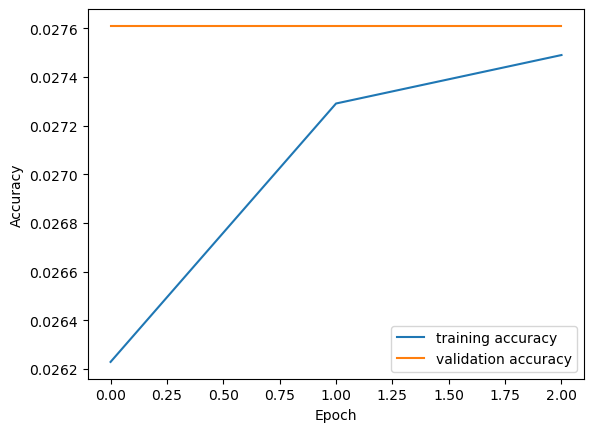

In [31]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()